# Task 1: Generate t-SNE projections of a synthetic 2D uniform grid

***

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import manifold

%matplotlib inline

In [2]:
random_seed = 100

Create the 2D uniform grid dataset:

In [3]:
n_points = 30

In [4]:
x, y = np.meshgrid(np.linspace(-1,1,n_points), np.linspace(-1,1,n_points))
x = x.ravel()[:,None]
y = y.ravel()[:,None]

idx = np.array([i for i in range(0,len(x))]).ravel()[:,None]

data = np.hstack((x,y))

(n_observations, _) = np.shape(data)

We also create a special colormap for this dataset, such that colors every data point with a different color. This will help us see which neighborhood each point was coming from.

In [5]:
colors_rgb = []

for i in range(0,n_points):
    for j in range(0,n_points):
        colors_rgb.append([0, i/n_points, j/n_points, 1])

custom_cmap = ListedColormap(colors_rgb)

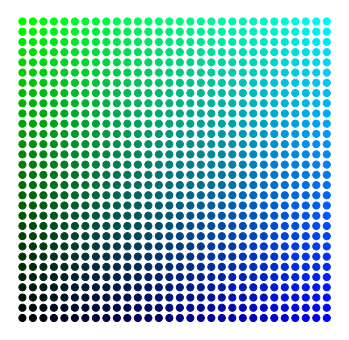

In [6]:
fig = plt.figure(figsize=(6,6))
plt.scatter(x, y, c=idx, cmap=custom_cmap, s=50)
plt.xticks([])
plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.savefig('Task-1-dataset.png', dpi=100, bbox_inches='tight')

Run t-SNE on the dataset:

In [7]:
tic = time.perf_counter()

n_components = 2
perplexity = 20
early_exaggeration = 12

X_TSNE = manifold.TSNE(n_components=n_components, 
                       early_exaggeration=early_exaggeration, 
                       perplexity=perplexity, 
                       init="random",
                       random_state=random_seed).fit_transform(data)

toc = time.perf_counter()

print(f'Time it took: {(toc - tic)/60:0.1f} minutes.')

Time it took: 0.0 minutes.


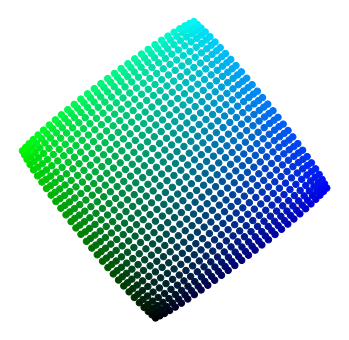

In [8]:
fig = plt.figure(figsize=(6,6))
plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=idx, cmap=custom_cmap, s=40)
plt.xticks([])
plt.yticks([])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.savefig('Task-1-t-SNE.png', dpi=100, bbox_inches='tight')

***